In [1]:
pip install lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     ------- ------------------------------- 51.2/275.7 kB 1.3 MB/s eta 0:00:01
     -------------- ----------------------- 102.4/275.7 kB 1.2 MB/s eta 0:00:01
     ------------------------- ------------ 184.3/275.7 kB 1.4 MB/s eta 0:00:01
     ------------------------------------ - 266.2/275.7 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=dd8facdeaa762b796879cda837fd63a9c0e5a0f86dd5d4e5e61946f9af37ffe2
  Stored in directory: c:\users\berke\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install tensorflow

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import fetch_openml
from lime.lime_tabular import LimeTabularExplainer

In [3]:
df_train=pd.read_csv('UNSW_NB15_training-set.csv',dtype=str, encoding="utf-8", header=None)

In [4]:
df_test =pd.read_csv('UNSW_NB15_testing-set.csv',dtype=str, encoding="utf-8", header=None)

In [5]:

df_train

0         1      2        3      4      5      6       7       8   \
0         id       dur  proto  service  state  spkts  dpkts  sbytes  dbytes   
1          1  0.000011    udp        -    INT      2      0     496       0   
2          2  0.000008    udp        -    INT      2      0    1762       0   
3          3  0.000005    udp        -    INT      2      0    1068       0   
4          4  0.000006    udp        -    INT      2      0     900       0   
...      ...       ...    ...      ...    ...    ...    ...     ...     ...   
82328  82328  0.000005    udp        -    INT      2      0     104       0   
82329  82329  1.106101    tcp        -    FIN     20      8   18062     354   
82330  82330         0    arp        -    INT      1      0      46       0   
82331  82331         0    arp        -    INT      1      0      46       0   
82332  82332  0.000009    udp        -    INT      2      0     104       0   

                9   ...                35              36            37  \
0             rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login   
1       90909.0902  ...                 1               2             0   
2      125000.0003  ...                 1               2             0   
3      200000.0051  ...                 1               3             0   
4      166666.6608  ...                 1               3             0   
...            ...  ...               ...             ...           ...   
82328  200000.0051  ...                 1               2             0   
82329    24.410067  ...                 1               1             0   
82330            0  ...                 1               1             0   
82331            0  ...                 1               1             0   
82332  111111.1072  ...                 1               1             0   

               38                39          40          41               42  \
0      ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports   
1               0                 0           1           2                0   
2               0                 0           1           2                0   
3               0                 0           1           3                0   
4               0                 0           2           3                0   
...           ...               ...         ...         ...              ...   
82328           0                 0           2           1                0   
82329           0                 0           3           2                0   
82330           0                 0           1           1                1   
82331           0                 0           1           1                1   
82332           0                 0           1           1                0   

               43     44  
0      attack_cat  label  
1          Normal      0  
2          Normal      0  
3          Normal      0  
4          Normal      0  
...           ...    ...  
82328      Normal      0  
82329      Normal      0  
82330      Normal      0  
82331      Normal      0  
82332      Normal      0  

[82333 rows x 45 columns]

In [6]:

df_train.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44],
      dtype='int64')

In [7]:

df = pd.concat([df_train, df_test])
# information about the dataset

In [8]:

df.columns = [
    'id',
    'dur',
    'proto',
    'service',
    'state',
    'spkts',
    'dpkts',
    'sbytes',
    'dbytes',
    'rate',
    'sttl',
    'dttl',
    'sload',
    'dload',
    'sloss',
    'dloss',
    'sinpkt',
    'dinpkt',
    'sjit',
    'djit',
    'swin',
    'stcpb',
    'dtcpb',
    'dwin',
    'tcprtt',
    'synack',
    'ackdat',
    'smean',
    'dmean',
    'trans_depth',
    'response_body_len',
    'ct_srv_src',
    'ct_state_ttl',
    'ct_dst_ltm',
    'ct_src_dport_ltm',
    'ct_dst_sport_ltm',
    'ct_dst_src_ltm',
    'is_ftp_login',
    'ct_ftp_cmd',
    'ct_flw_http_mthd',
    'ct_src_ltm',
    'ct_srv_dst',
    'is_sm_ips_ports',
    'attack_cat',
    'label',

]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257675 entries, 0 to 175341
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 257675 non-null  object
 1   dur                257675 non-null  object
 2   proto              257675 non-null  object
 3   service            257675 non-null  object
 4   state              257675 non-null  object
 5   spkts              257675 non-null  object
 6   dpkts              257675 non-null  object
 7   sbytes             257675 non-null  object
 8   dbytes             257675 non-null  object
 9   rate               257675 non-null  object
 10  sttl               257675 non-null  object
 11  dttl               257675 non-null  object
 12  sload              257675 non-null  object
 13  dload              257675 non-null  object
 14  sloss              257675 non-null  object
 15  dloss              257675 non-null  object
 16  sinpkt             257675

In [10]:
df.describe(include='all')

id       dur   proto service   state   spkts   dpkts  sbytes  \
count   257675    257675  257675  257675  257675  257675  257675  257675   
unique  175342    109946     134      14      12     647     628    9383   
top         id  0.000009     tcp       -     FIN       2       0     114   
freq         2     28577  123041  141321  117164  122182  120288   57279   

        dbytes         rate  ... ct_dst_sport_ltm ct_dst_src_ltm is_ftp_login  \
count   257675       257675  ...           257675         257675       257675   
unique    8654       115764  ...               36             59            5   
top          0  111111.1072  ...                1              1            0   
freq    120288        28615  ...           163523          74417       254428   

       ct_ftp_cmd ct_flw_http_mthd ct_src_ltm ct_srv_dst is_sm_ips_ports  \
count      257675           257675     257675     257675          257675   
unique          5               12         53         58               3   
top             0                0          1          1               0   
freq       254426           232253      63870      58824          253995   

       attack_cat   label  
count      257675  257675  
unique         11       3  
top        Normal       1  
freq        93000  164673  

[4 rows x 45 columns]

In [11]:
df["label"].unique()

array(['label', '0', '1'], dtype=object)

In [12]:
df["proto"].unique()

array(['proto', 'udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp',
       'ip', 'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp',
       'pup', 'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', '

In [13]:

df.iloc[:,-1].value_counts()

label
1        164673
0         93000
label         2
Name: count, dtype: int64

In [14]:

df.drop(df.loc[df["label"] == "label"].index, inplace=True)

In [15]:

df = df.replace([np.inf, -np.inf], np.nan)
# Count nan values
df.isna().sum().sum()

0

In [16]:

df.dropna(inplace=True)
df.isna().sum().sum()
df.shape

(257673, 45)

In [17]:

df.drop_duplicates(inplace=True)
df.shape

(257673, 45)

In [18]:
print(df.duplicated().sum())

0


In [19]:
print("Read {} rows.".format(len(df)))
print("The number of data points are:", df.shape[0])
print("The number of features are:", df.shape[1])
output=df['label'].values
labels=set(output)
print("The different type of output labels are:", labels)
print("The number of different output labels are:", len(labels))

Read 257673 rows.
The number of data points are: 257673
The number of features are: 45
The different type of output labels are: {'1', '0'}
The number of different output labels are: 2


In [20]:
print(df.isna().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [21]:
df[0:5]

id       dur proto service state spkts dpkts sbytes dbytes         rate  \
1  1  0.000011   udp       -   INT     2     0    496      0   90909.0902   
2  2  0.000008   udp       -   INT     2     0   1762      0  125000.0003   
3  3  0.000005   udp       -   INT     2     0   1068      0  200000.0051   
4  4  0.000006   udp       -   INT     2     0    900      0  166666.6608   
5  5   0.00001   udp       -   INT     2     0   2126      0  100000.0025   

   ... ct_dst_sport_ltm ct_dst_src_ltm is_ftp_login ct_ftp_cmd  \
1  ...                1              2            0          0   
2  ...                1              2            0          0   
3  ...                1              3            0          0   
4  ...                1              3            0          0   
5  ...                1              3            0          0   

  ct_flw_http_mthd ct_src_ltm ct_srv_dst is_sm_ips_ports attack_cat label  
1                0          1          2               0     Normal     0  
2                0          1          2               0     Normal     0  
3                0          1          3               0     Normal     0  
4                0          2          3               0     Normal     0  
5                0          2          3               0     Normal     0  

[5 rows x 45 columns]

<Axes: xlabel='label'>

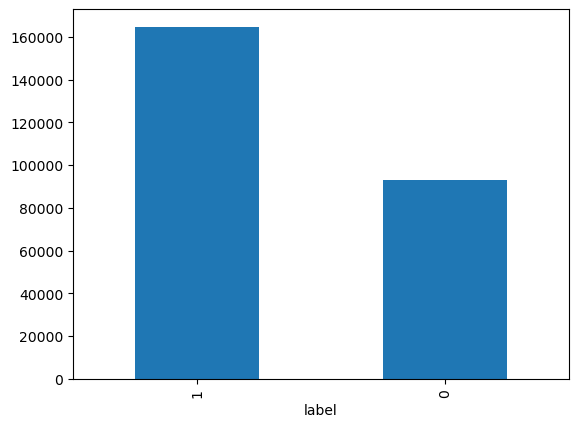

In [22]:
df['label'].value_counts().plot.bar()

In [23]:
df['label'].value_counts(normalize=True)

label
1    0.639077
0    0.360923
Name: proportion, dtype: float64

In [24]:
df = df.drop(columns=['id', 'attack_cat'])

In [25]:
df_cat = df.select_dtypes(exclude=[np.number])
print(df_cat.columns)
for feature in df_cat.columns:
    df[feature] = LabelEncoder().fit_transform(df[feature])

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')


In [26]:
df.head()

dur  proto  service  state  spkts  dpkts  sbytes  dbytes    rate  sttl  \
1   11    119        0      5    131      0    6670       0  114233     3   
2    8    119        0      5    131      0    1851       0    9541     3   
3    5    119        0      5    131      0     173       0   35966     3   
4    6    119        0      5    131      0    8924       0   22717     3   
5   10    119        0      5    131      0    2646       0    2984     3   

   ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
1  ...                 0                 0              11             0   
2  ...                 0                 0              11             0   
3  ...                 0                 0              22             0   
4  ...                11                 0              22             0   
5  ...                11                 0              22             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
1           0                 0           0          11                0   
2           0                 0           0          11                0   
3           0                 0           0          22                0   
4           0                 0          11          22                0   
5           0                 0          11          22                0   

   label  
1      0  
2      0  
3      0  
4      0  
5      0  

[5 rows x 43 columns]

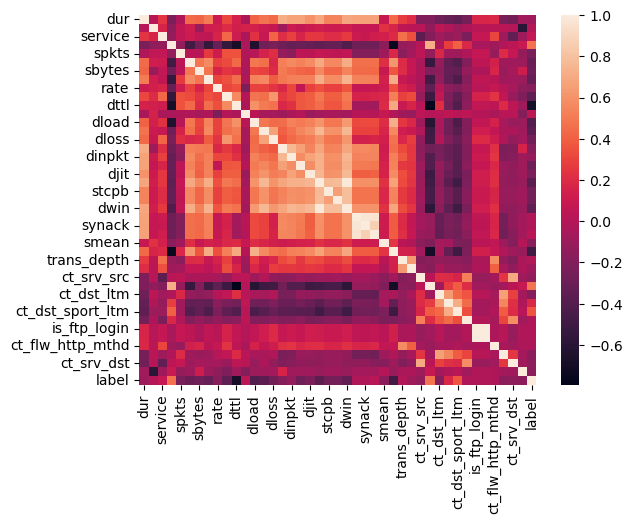

In [27]:
sns.heatmap(df.corr())
plt.show()

In [41]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [42]:
y_pred = model.predict(X_test)

# Performans metriklerini hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdırın
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9317163093043562
Precision: 0.9316386402773501
Recall: 0.9317163093043562
F1 Score: 0.9316731648374856


In [44]:
 
# Importing the module for LimeTabularExplainer
from lime import lime_tabular
 
# Instantiating the explainer object by passing in the training set,
# and the extracted features
explainer_lime = lime_tabular.LimeTabularExplainer(X_train,
                                                   feature_names=features,
                                                   verbose=True, 
                                                   mode='regression')

In [49]:
 
# Index corresponding to the test vector
i = 24
 
# Number denoting the top features
k = 43
 
# Calling the explain_instance method by passing in the:
#    1) ith test vector
#    2) prediction function used by our prediction model('reg' in this case)
#    3) the top features which we want to see, denoted by k
 
exp_lime = explainer_lime.explain_instance(
    X_test[i], model.predict, num_features=k)
 
# Finally visualizing the explanations
exp_lime.show_in_notebook()

Intercept 0.13218393859634614
Prediction_local [1.07553405]
Right: 1


In [50]:
import xgboost as xgb

In [51]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
y_pred=model_xgb.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("XGB-Classifier Multi-class Set-Accuracy is ", ac)

XGB-Classifier Multi-class Set-Accuracy is  94.78412729213156


In [54]:
 
# Index corresponding to the test vector
i = 10
 
# Number denoting the top features
k = 25
 
# Calling the explain_instance method by passing in the:
#    1) ith test vector
#    2) prediction function used by our prediction model('reg' in this case)
#    3) the top features which we want to see, denoted by k
 
exp_lime = explainer_lime.explain_instance(
    X_test[i], model_xgb.predict, num_features=k)
 
# Finally visualizing the explanations
exp_lime.show_in_notebook()

Intercept 0.45069668303882116
Prediction_local [1.10341183]
Right: 1


In [28]:
columns = df.columns.tolist()
corr = df.corr()
correlated_vars = []
for i in range(len(columns) - 1):
    for j in range(i+1, len(columns)):
        if corr[columns[i]][columns[j]] > 0.98:
            print(columns[i], columns[j], corr[columns[i]][columns[j]])
            correlated_vars.append(columns[j])

swin dwin 0.9804620375263537
is_ftp_login ct_ftp_cmd 0.9988177393466395


In [29]:
df = df.drop(columns=correlated_vars)

In [30]:
X = df.drop(columns=['label'])
feature_list = list(X.columns)
X = np.array(X)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 206138
Testing set: 51535


In [32]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [55]:
# Instantiating the prediction model - an extra-trees regressor
from sklearn.ensemble import ExtraTreesRegressor
reg = DecisionTreeClassifier()

# Fitting the predictino model onto the training set
reg.fit(X_train, y_train)

# Checking the model's performance on the test set
print('R2 score for the model on test set =', reg.score(X_test,y_test))

R2 score for the model on test set = 0.9366644028330261


In [56]:
# Importing the module for LimeTabularExplainer
from lime import lime_tabular
features = feature_list
# Instantiating the explainer object by passing in the training set,
# and the extracted features
explainer_lime = lime_tabular.LimeTabularExplainer(X_train,
												feature_names=features,
												verbose=True, 
												mode='regression')

IndexError: list index out of range

In [ ]:
# Index corresponding to the test vector
i = 10

# Number denoting the top features
k = 5

# Calling the explain_instance method by passing in the:
# 1) ith test vector
# 2) prediction function used by our prediction model('reg' in this case)
# 3) the top features which we want to see, denoted by k

exp_lime = explainer_lime.explain_instance(
	X_test[i], reg.predict, num_features=k)

# Finally visualizing the explanations
exp_lime.show_in_notebook()

In [37]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [38]:
y_pred = model.predict(X_test)

# Performans metriklerini hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdırın
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.931735713592704
Precision: 0.9316587218796665
Recall: 0.931735713592704
F1 Score: 0.9316929879526089


In [39]:
X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
y_train_np = y_train.values if hasattr(y_train, 'values') else y_train

In [ ]:
 
# Importing the module for LimeTabularExplainer
from lime import lime_tabular
 
# Instantiating the explainer object by passing in the training set,
# and the extracted features
explainer_lime = lime_tabular.LimeTabularExplainer(X_train,
                                                   feature_names=features,
                                                   verbose=True, 
                                                   mode='regression')

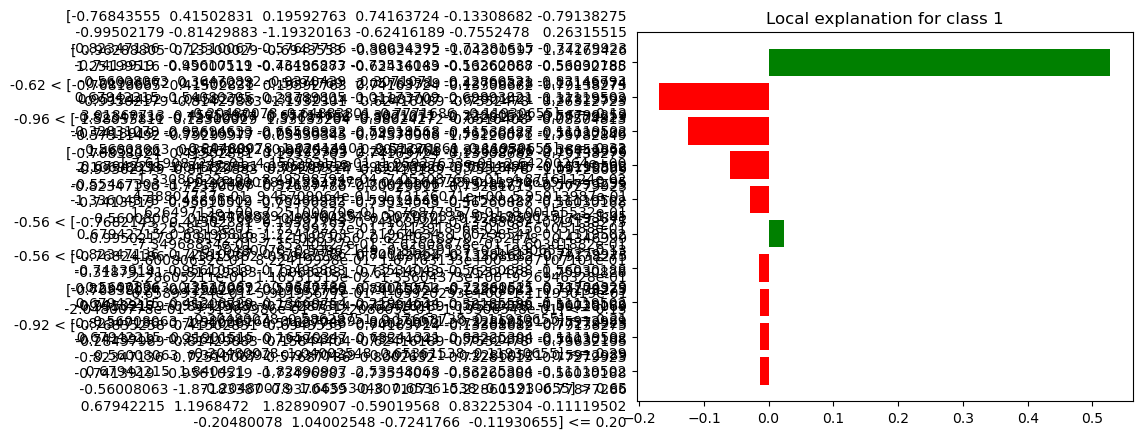

In [57]:
base_estimator = DecisionTreeClassifier(max_depth=1)
models = {}
models['Adaboost Classifier'] = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)
models['Decision Tree Classifier'] = DecisionTreeClassifier()
models['Random Forest Classifier'] = RandomForestClassifier(n_estimators=1000, random_state=42)
models['Gaussian Naive Bayes'] = GaussianNB()
models['Logistic Regression '] = LogisticRegression(max_iter=100000, random_state=42)
models['KNN'] = KNeighborsClassifier(n_neighbors=3)
models['SVM'] = SVC(max_iter=10000, random_state=42)




TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [40]:
train_score, accuracy, precision, recall, training_time, y_pred = {}, {}, {}, {}, {}, {}
for key in models.keys():
    start_time = time.time()
    models[key].fit(X_train, y_train)
    training_time[key] = time.time() - start_time
    
    y_pred[key] = models[key].predict(X_test)
    
    train_score[key] = models[key].score(X_train, y_train)
    accuracy[key] = models[key].score(X_test, y_test)
    precision[key] = precision_score(y_test, y_pred[key])
    recall[key] = recall_score(y_test, y_pred[key])

C:\Users\beyza\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\beyza\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [41]:
rfc_rfe = 'Random Forest Classifier + Recursive Feature Elimination'
models[rfc_rfe] = RandomForestClassifier()
rfe = RFE(models[rfc_rfe])
start_time = time.time()
rfe.fit(X_train, y_train)
training_time[rfc_rfe] = time.time() - start_time

X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

start_time = time.time()
models[rfc_rfe].fit(X_train_rfe, y_train)
training_time[rfc_rfe] = training_time[rfc_rfe] + (time.time() - start_time)
    
y_pred[key] = models[rfc_rfe].predict(X_test_rfe)
    
train_score[rfc_rfe] = models[rfc_rfe].score(X_train_rfe, y_train)
accuracy[rfc_rfe] = models[rfc_rfe].score(X_test_rfe, y_test)
precision[rfc_rfe] = precision_score(y_test, y_pred[key])
recall[rfc_rfe] = recall_score(y_test, y_pred[key])

In [42]:
print("Old number of features:", X.shape[1])
print("New number of features:", len(rfe.estimator_.feature_importances_))

Old number of features: 40
New number of features: 20


In [43]:
df_models = pd.DataFrame(index=models.keys(), columns=['Training score', 'Accuracy', 'Precision', 'Recall', 'Training time'])
df_models['Training score'] = train_score.values()
df_models['Accuracy'] = accuracy.values()
df_models['Precision'] = precision.values()
df_models['Recall'] = recall.values()
df_models['Training time'] = training_time.values()

In [44]:
df_models

Training score  Accuracy  \
Adaboost Classifier                                       0.927820  0.927700   
Decision Tree Classifier                                  0.997594  0.937538   
Random Forest Classifier                                  0.997594  0.952227   
Gaussian Naive Bayes                                      0.835077  0.832269   
Logistic Regression                                       0.896715  0.893956   
KNN                                                       0.962962  0.929019   
SVM                                                       0.849222  0.845697   
Random Forest Classifier + Recursive Feature El...        0.994935  0.947123   

                                                    Precision    Recall  \
Adaboost Classifier                                  0.938993  0.947983   
Decision Tree Classifier                             0.951159  0.950666   
Random Forest Classifier                             0.962015  0.962954   
Gaussian Naive Bayes                                 0.839676  0.910236   
Logistic Regression                                  0.894105  0.945330   
KNN                                                  0.945346  0.942983   
SVM                                                  0.913243  0.837058   
Random Forest Classifier + Recursive Feature El...   0.955940  0.961216   

                                                    Training time  
Adaboost Classifier                                     48.604334  
Decision Tree Classifier                                 4.551301  
Random Forest Classifier                               482.675637  
Gaussian Naive Bayes                                     0.124965  
Logistic Regression                                      5.391871  
KNN                                                      0.015622  
SVM                                                    352.258380  
Random Forest Classifier + Recursive Feature El...    1141.083782

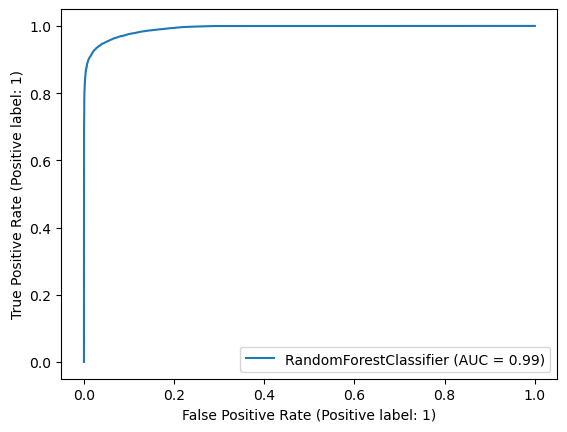

In [45]:
display = RocCurveDisplay.from_estimator(models['Random Forest Classifier'], X_test, y_test)
plt.show()

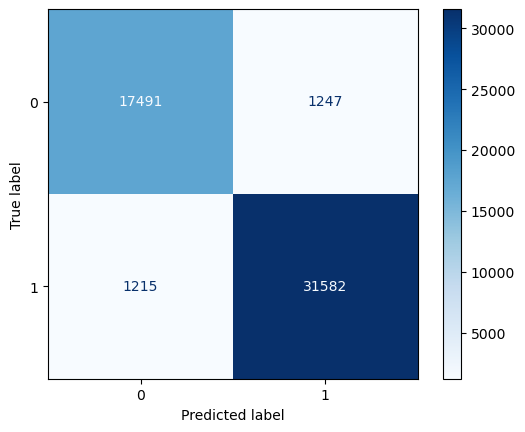

In [47]:
cm = confusion_matrix(y_test, y_pred['Random Forest Classifier'], labels=models['Random Forest Classifier'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models['Random Forest Classifier'].classes_)
disp.plot(cmap='Blues')
plt.show()

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

In [56]:
target = df.values[:,44:45]

In [57]:
target

array([], shape=(257673, 0), dtype=int32)

In [58]:

# Reshape the data to fit the CNN model input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(206138, 40, 1) (51535, 40, 1) (206138,) (51535,)


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/20
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.8333 - loss: 71.5698 - val_accuracy: 0.8825 - val_loss: 0.2583
Epoch 2/20
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.8618 - loss: 0.3256 - val_accuracy: 0.8453 - val_loss: 0.3551
Epoch 3/20
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.8590 - loss: 0.3531 - val_accuracy: 0.8770 - val_loss: 0.2822
Epoch 4/20
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.8766 - loss: 0.3070 - val_accuracy: 0.8908 - val_loss: 0.2575
Epoch 5/20
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.8910 - loss: 0.2603 - val_accuracy: 0.8974 - val_loss: 0.2391
Epoch 6/20
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.8936 - loss: 0.2354 - val_accuracy: 0.8950 - val_loss: 0.2286
Epoch 7/20
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.8969 - loss: 0.2318 - val_accuracy: 0.8965 - val_loss: 0.2164
Epoch 8/20
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.8965 - loss: 

In [61]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

1611/1611 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Accuracy: 0.9116134665761133
Precision: 0.914677147231313
Recall: 0.9116134665761133
F1 Score: 0.9123026655829786


In [62]:

X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(206138, 40, 1) (51535, 40, 1) (206138,) (51535,)


In [63]:
model = keras.Sequential([
    layers.LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True),
    layers.LSTM(64),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/15


C:\Users\beyza\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6442/6442 ━━━━━━━━━━━━━━━━━━━━ 255s 39ms/step - accuracy: 0.8853 - loss: 0.2428 - val_accuracy: 0.9171 - val_loss: 0.1676
Epoch 2/15
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 235s 36ms/step - accuracy: 0.9202 - loss: 0.1629 - val_accuracy: 0.9244 - val_loss: 0.1519
Epoch 3/15
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 247s 38ms/step - accuracy: 0.9269 - loss: 0.1529 - val_accuracy: 0.9293 - val_loss: 0.1500
Epoch 4/15
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 231s 36ms/step - accuracy: 0.9294 - loss: 0.1484 - val_accuracy: 0.9323 - val_loss: 0.1428
Epoch 5/15
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 243s 38ms/step - accuracy: 0.9318 - loss: 0.1456 - val_accuracy: 0.9338 - val_loss: 0.1415
Epoch 6/15
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 240s 37ms/step - accuracy: 0.9314 - loss: 0.1442 - val_accuracy: 0.9335 - val_loss: 0.1433
Epoch 7/15
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 299s 46ms/step - accuracy: 0.9324 - loss: 0.1417 - val_accuracy: 0.9322 - val_loss: 0.1433
Epoch 8/15
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 280s 44ms/step - accuracy: 0.9332 - lo

In [64]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

1611/1611 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step
Accuracy: 0.9346463568448627
Precision: 0.9357830099629971
Recall: 0.9346463568448627
F1 Score: 0.934945942261011
